<a href="https://colab.research.google.com/github/OJB-Quantum/Notebooks/blob/main/Time_Dependent_Fractal_Schrodinger_Equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import hbar, pi
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

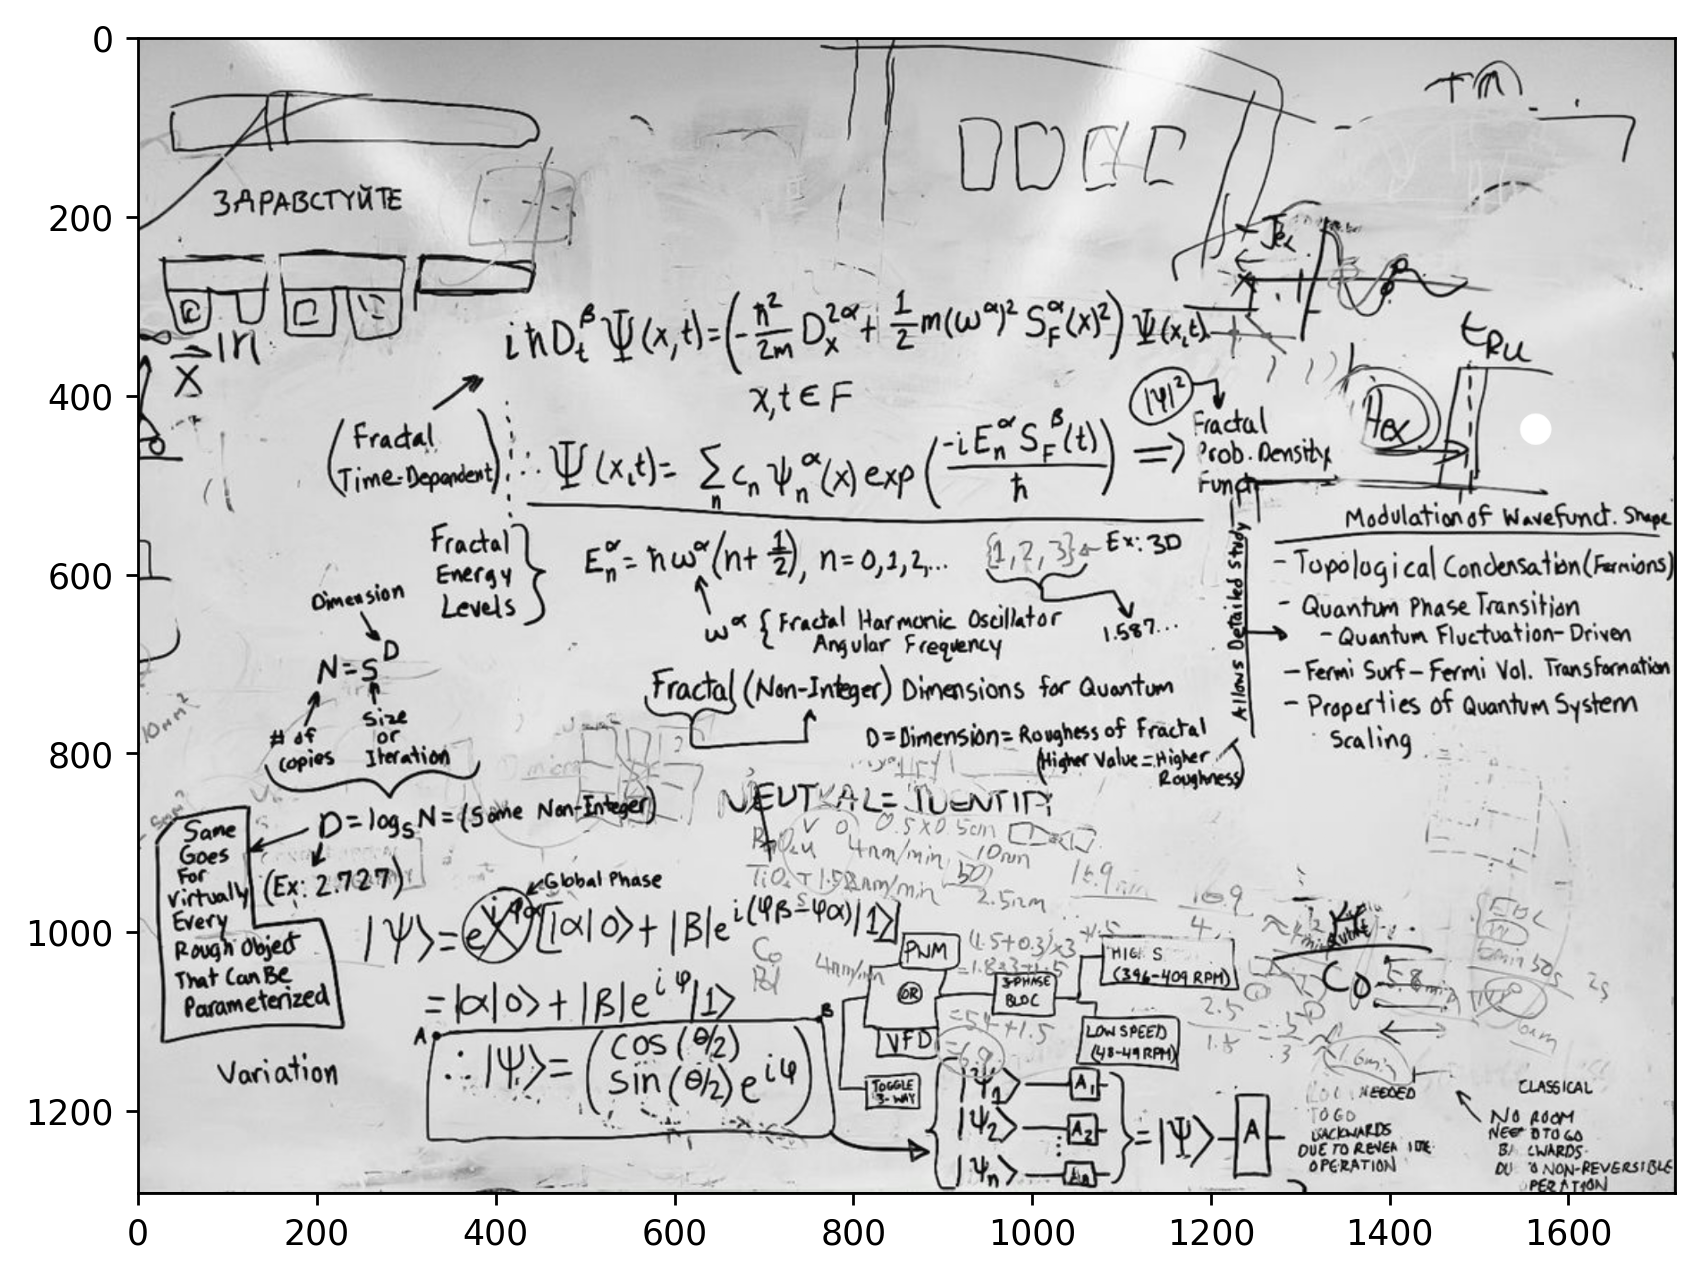

In [3]:
image_path = 'FTDSE.png'

plt.figure(figsize=(8,6), dpi=250)

# Read and display the image
img = mpimg.imread(image_path)
imgplot = plt.imshow(img)
plt.show()

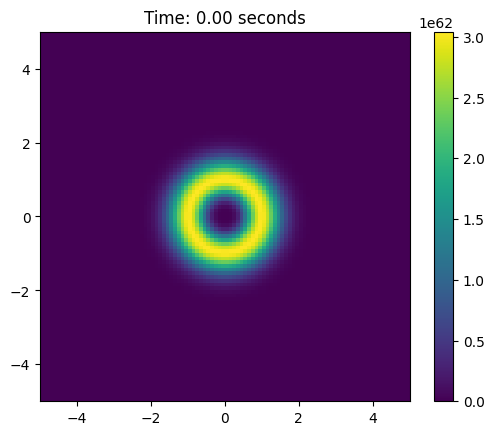

<ipython-input-4-3f716f7d3221>:33: RuntimeWarning: overflow encountered in divide
  next_psi = psi - 1j * H_psi * dt / hbar
<ipython-input-4-3f716f7d3221>:28: RuntimeWarning: invalid value encountered in multiply
  laplacian_psi = (np.roll(psi, 1, axis=0) - 2 * psi + np.roll(psi, -1, axis=0)) / dx**2 \
<ipython-input-4-3f716f7d3221>:28: RuntimeWarning: invalid value encountered in subtract
  laplacian_psi = (np.roll(psi, 1, axis=0) - 2 * psi + np.roll(psi, -1, axis=0)) / dx**2 \
<ipython-input-4-3f716f7d3221>:28: RuntimeWarning: invalid value encountered in add
  laplacian_psi = (np.roll(psi, 1, axis=0) - 2 * psi + np.roll(psi, -1, axis=0)) / dx**2 \
<ipython-input-4-3f716f7d3221>:28: RuntimeWarning: overflow encountered in divide
  laplacian_psi = (np.roll(psi, 1, axis=0) - 2 * psi + np.roll(psi, -1, axis=0)) / dx**2 \
<ipython-input-4-3f716f7d3221>:28: RuntimeWarning: invalid value encountered in divide
  laplacian_psi = (np.roll(psi, 1, axis=0) - 2 * psi + np.roll(psi, -1, axis=0)) 

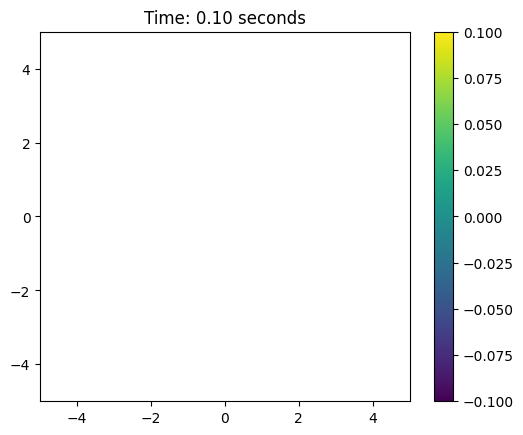

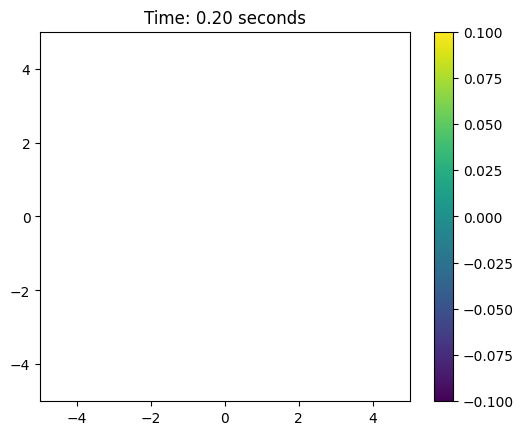

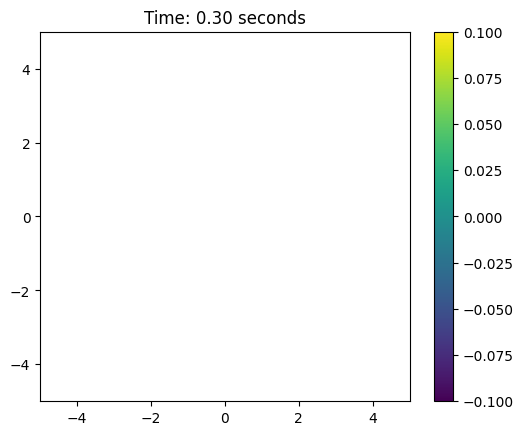

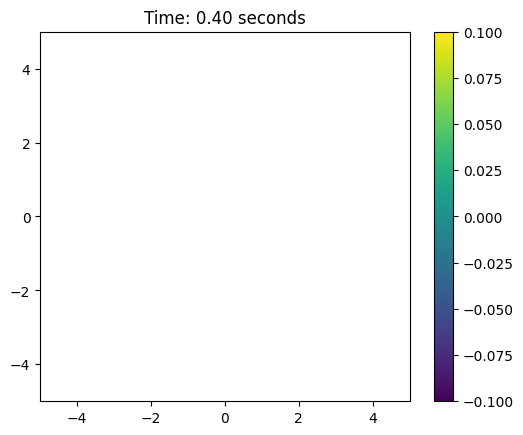

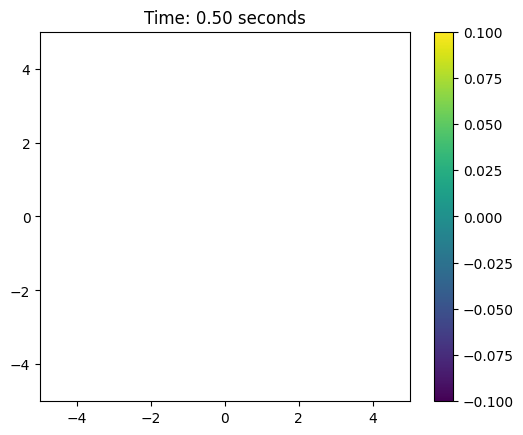

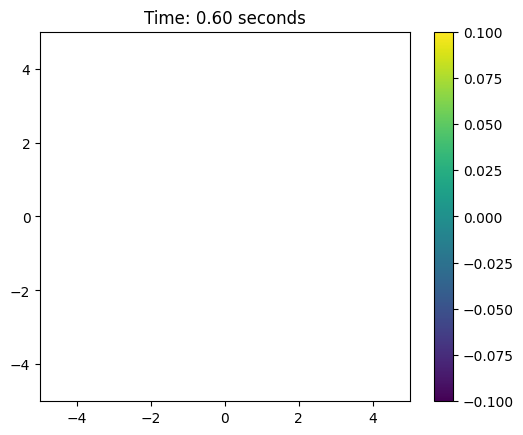

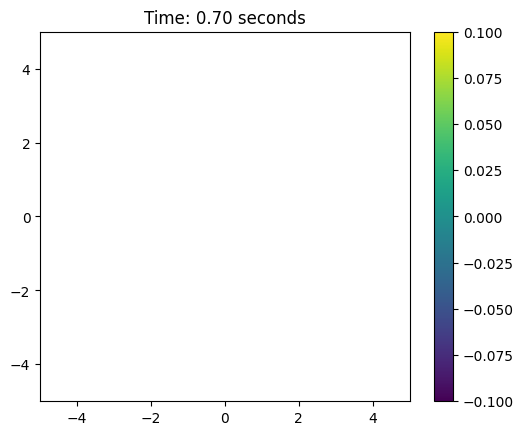

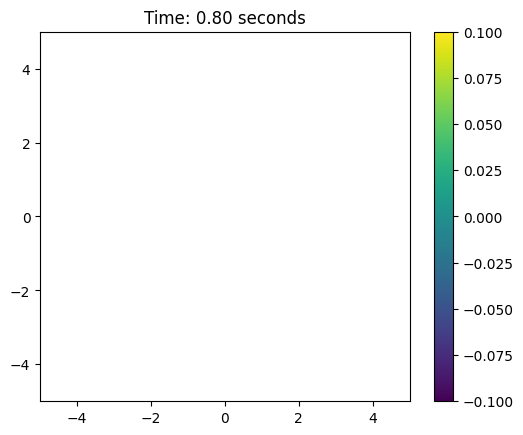

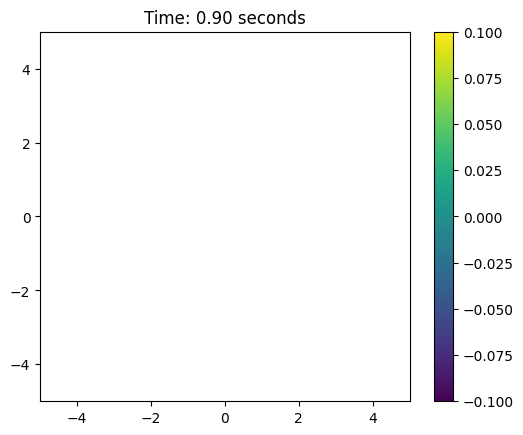

In [4]:

# Constants
m = 1.0  # Mass of the particle
dx = 0.1  # Space step
dt = 0.01  # Time step
size = 100  # Size of the space grid
time_steps = 100  # Number of time steps to evolve

# Potential function V(x, y)
def V(x, y):
    return 0.5 * m * (x**2 + y**2)  # Harmonic oscillator potential

# Create a grid
x = np.linspace(-5, 5, size)
y = np.linspace(-5, 5, size)
X, Y = np.meshgrid(x, y)

# Initial wave function ψ(x, y, t=0)
def initial_wave_function(X, Y):
    return np.exp(-(X**2 + Y**2))

# Initialize wave function
psi = initial_wave_function(X, Y)

# Time evolution function
def evolve(psi, V, dt, dx, m):
    # Compute the Laplacian
    # For standard dimensions, we use a finite difference approximation
    laplacian_psi = (np.roll(psi, 1, axis=0) - 2 * psi + np.roll(psi, -1, axis=0)) / dx**2 \
                  + (np.roll(psi, 1, axis=1) - 2 * psi + np.roll(psi, -1, axis=1)) / dx**2

    # Compute the next time step ψ(x, y, t+dt)
    H_psi = - (hbar**2 / (2 * m)) * laplacian_psi + V(X, Y) * psi
    next_psi = psi - 1j * H_psi * dt / hbar
    return next_psi

# Evolve the wave function over the specified number of time steps
for t in range(time_steps):
    psi = evolve(psi, V, dt, dx, m)
    if t % 10 == 0:  # Plot every 10 steps
        plt.imshow(abs(psi)**2, extent=(x.min(), x.max(), y.min(), y.max()))
        plt.title(f"Time: {t * dt:.2f} seconds")
        plt.colorbar()
        plt.show()

# Calculate probability density
probability_density = abs(psi)**2


In [5]:
from scipy.constants import hbar, m_e, pi
from scipy.sparse import diags
from scipy.linalg import eigh_tridiagonal

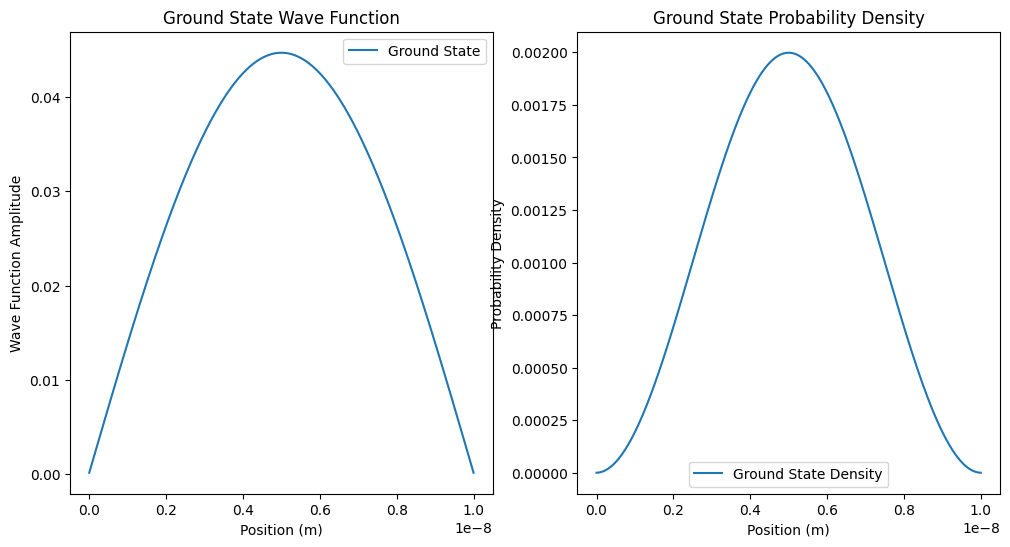

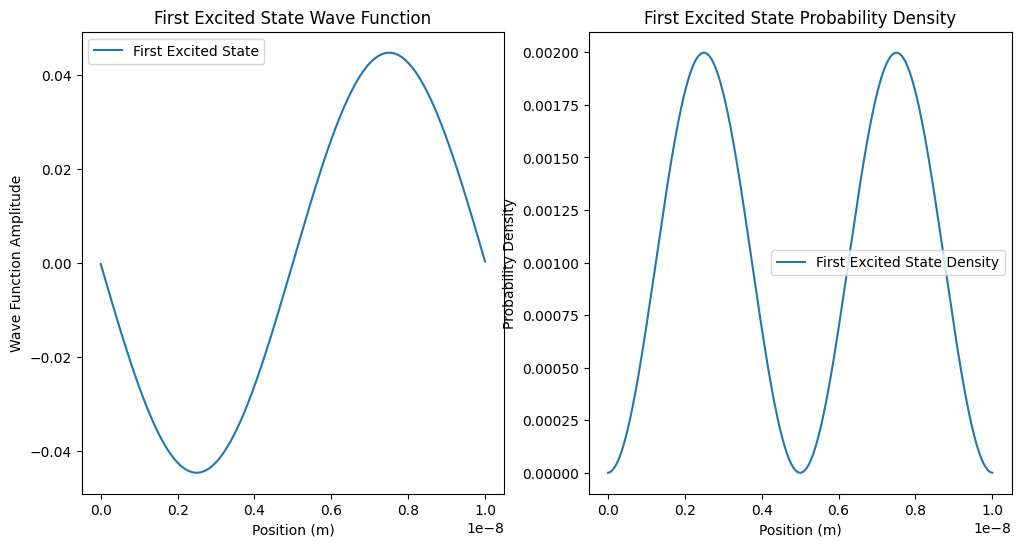

In [6]:
# Constants (in SI units for simplicity)
m = m_e  # Mass of the electron
L = 1e-8  # Size of the well in meters
N = 1000  # Number of points in the grid
x = np.linspace(0, L, N)  # Position coordinates
dx = x[1] - x[0]  # Delta x

# Potential well function V(x)
V = np.zeros(N)  # A simple square well potential

# Kinetic energy operator T
diagonal = np.ones(N) / dx**2
off_diagonal = -0.5 * np.ones(N-1) / dx**2
T = (hbar**2 / (2 * m)) * diags([diagonal, off_diagonal, off_diagonal], [0, -1, 1])

# Solve for eigenvalues and eigenvectors
eigenvalues, eigenvectors = eigh_tridiagonal(diagonal, off_diagonal)

# Ground state and first excited state wave functions
ground_state_wave_function = eigenvectors[:, 0]
first_excited_state_wave_function = eigenvectors[:, 1]

# Probability densities
ground_state_density = abs(ground_state_wave_function)**2
first_excited_state_density = abs(first_excited_state_wave_function)**2

# Plot the ground state wave function and probability density
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x, ground_state_wave_function, label="Ground State")
plt.title("Ground State Wave Function")
plt.xlabel("Position (m)")
plt.ylabel("Wave Function Amplitude")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, ground_state_density, label="Ground State Density")
plt.title("Ground State Probability Density")
plt.xlabel("Position (m)")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

# Plot the first excited state wave function and probability density
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x, first_excited_state_wave_function, label="First Excited State")
plt.title("First Excited State Wave Function")
plt.xlabel("Position (m)")
plt.ylabel("Wave Function Amplitude")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, first_excited_state_density, label="First Excited State Density")
plt.title("First Excited State Probability Density")
plt.xlabel("Position (m)")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import hbar, m_e, pi
from scipy.sparse import diags
from scipy.linalg import eigh_tridiagonal

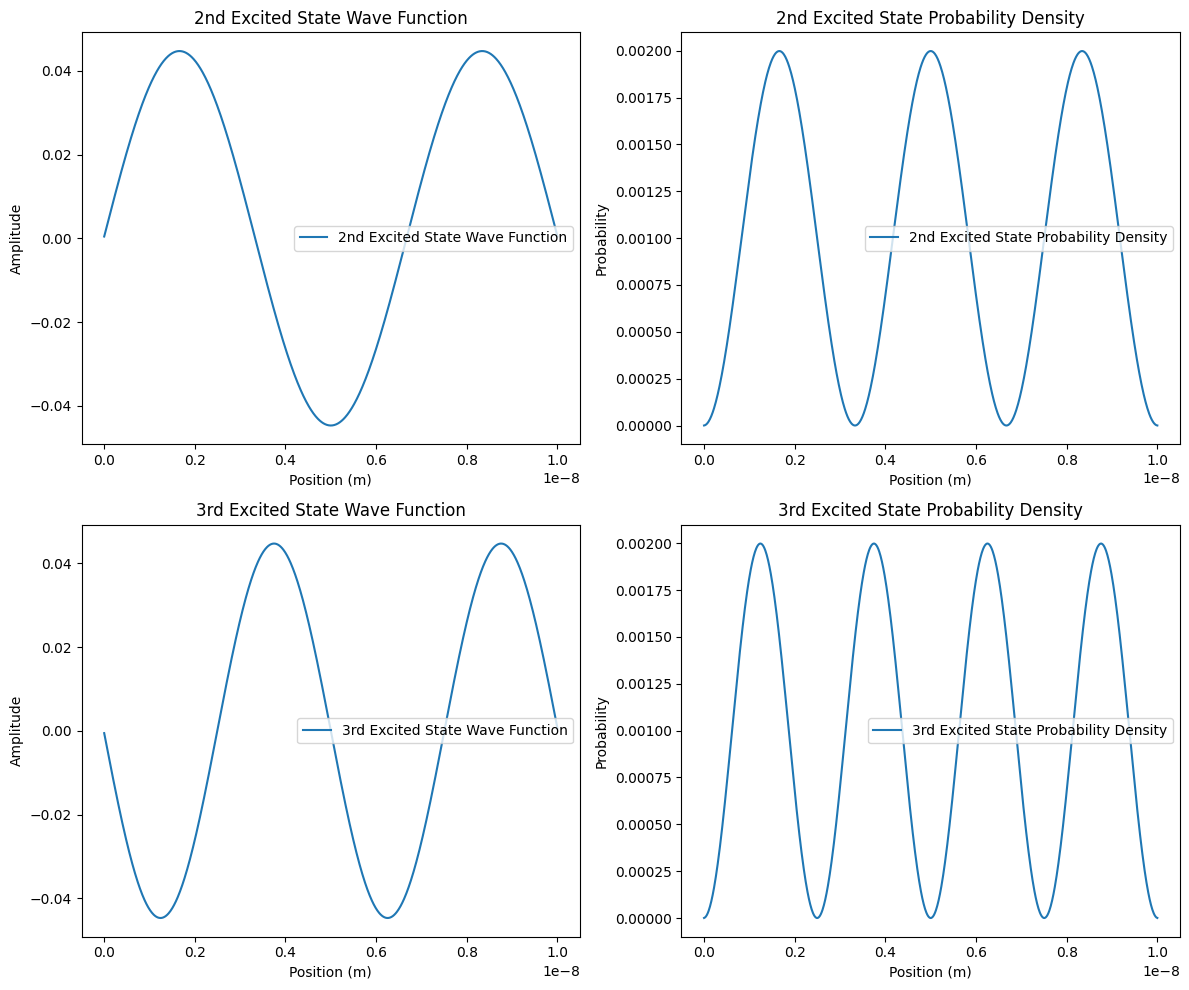

In [8]:


# Constants (in SI units for simplicity)
m = m_e  # Mass of the electron
L = 1e-8  # Size of the well in meters
N = 1000  # Number of points in the grid
x = np.linspace(0, L, N)  # Position coordinates
dx = x[1] - x[0]  # Delta x

# Potential well function V(x)
V = np.zeros(N)  # A simple square well potential

# Kinetic energy operator T
diagonal = np.ones(N) / dx**2
off_diagonal = -0.5 * np.ones(N-1) / dx**2
T = (hbar**2 / (2 * m)) * diags([diagonal, off_diagonal, off_diagonal], [0, -1, 1])

# Solve for eigenvalues and eigenvectors
eigenvalues, eigenvectors = eigh_tridiagonal(diagonal, off_diagonal)

# Select the wave functions for the 2nd and 3rd excited states
second_excited_state_wave_function = eigenvectors[:, 2]
third_excited_state_wave_function = eigenvectors[:, 3]

# Probability densities for the 2nd and 3rd excited states
second_excited_state_density = abs(second_excited_state_wave_function)**2
third_excited_state_density = abs(third_excited_state_wave_function)**2

# Plot the 2nd excited state wave function and probability density
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.plot(x, second_excited_state_wave_function, label="2nd Excited State Wave Function")
plt.title("2nd Excited State Wave Function")
plt.xlabel("Position (m)")
plt.ylabel("Amplitude")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(x, second_excited_state_density, label="2nd Excited State Probability Density")
plt.title("2nd Excited State Probability Density")
plt.xlabel("Position (m)")
plt.ylabel("Probability")
plt.legend()

# Plot the 3rd excited state wave function and probability density
plt.subplot(2, 2, 3)
plt.plot(x, third_excited_state_wave_function, label="3rd Excited State Wave Function")
plt.title("3rd Excited State Wave Function")
plt.xlabel("Position (m)")
plt.ylabel("Amplitude")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(x, third_excited_state_density, label="3rd Excited State Probability Density")
plt.title("3rd Excited State Probability Density")
plt.xlabel("Position (m)")
plt.ylabel("Probability")
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
!pip install utils
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from pylab import *
from numpy import *
import numpy as np
from PIL import Image
import math
import time
from random import random
from utils import *

(1292, 1720, 3)


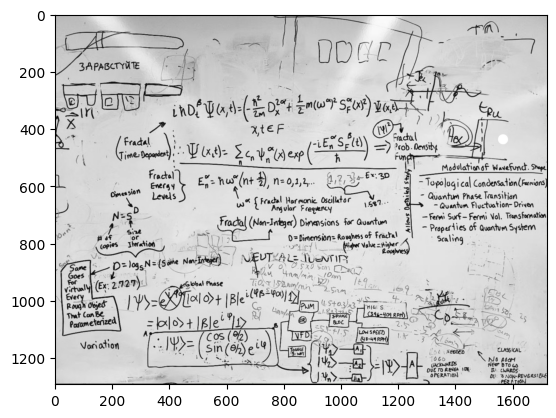

In [11]:
# Image attributes
img_path='FTDSE.png'

img = Image.open(img_path).convert('RGB')
image = np.array(img)
print(image.shape)
height=image.shape[0]
width=image.shape[1]
imshow(image)

In [12]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from pylab import *
from numpy import *
import numpy as np
import math
from random import random
from scipy.ndimage import geometric_transform
from scipy.ndimage import map_coordinates
from PIL import Image
def drawpoints(image, point, color,output_height, output_width):
    h = point[0]
    w = point[1]
    where_to_draw = []
    where_to_draw.append(point)
    where_to_draw.append([h-1,w])
    where_to_draw.append([h+1,w])
    where_to_draw.append([h,w-1])
    where_to_draw.append([h,w+1])
    new_where_to_draw=[]
    for item in where_to_draw:
        if item[0]>=0 and item[0]<output_height and item[1]>=0 and item[1]<output_width:
            new_where_to_draw.append(item)

    for item in new_where_to_draw:
        if color == 'red':
            image[item[0],item[1]]=[255,102,102]
        elif color == 'green':
            image[item[0],item[1]]=[0,204,0]
        elif color == 'blue':
            image[item[0],item[1]]=[0,128,255]

def shift_func(coords,a,b,c,d):
    """ Define the mobius transformation, although backwards """
    #turn the first two coordinates into an imaginary number
    z = coords[0] + 1j*coords[1]
    w = (d*z-b)/(-c*z+a) #the inverse mobius transform
    #take the color along for the ride
    return real(w),imag(w),coords[2]

def mobius_fast_interpolation(image, M, mode, output_height=None, output_width=None, user_defined=False, start_points = None, end_points = None):


    image = np.array(image)
    original_image=image
    height=image.shape[0]
    width=image.shape[1]
    #User can pick output size
    if output_height == None:
        output_height = height
    if output_width == None:
        output_width = width
    if user_defined ==True:
        # Method one
        # You pick starting and ending point
        a, b, c, d, original_points,new_points = getabcd_1fix(height,width,start_points, end_points)
    else:
        # Method two
        # Randomly generated starting the ending point
        a, b, c, d,original_points,new_points  = madmissable_abcd(M,height,width)
    e=[complex(0,0)]*height*width
    z=np.array(e).reshape(height,width)
    for i in range(0,height):
        for j in range(0,width):
            z[i,j]=complex(i,j)
    i=np.array(list(range(0,height))*width).reshape(width,height).T
    j=np.array(list(range(0,width))*height).reshape(height,width)

    r = ones((output_height, output_width,3),dtype=uint8)*255*0
    w = (a*z+b)/(c*z+d)
    first=real(w)*1
    second=imag(w)*1
    first=first.astype(int)
    second=second.astype(int)

    f1=first>=0
    f2=first<output_height
    f= f1 & f2
    s1=second>=0
    s2=second<output_width
    s= s1 & s2

    combined = s&f



    r[first[combined],second[combined],:]=image[i[combined],j[combined],:]

    r_interpolated = r.copy()
    u=[True]*output_height*output_width
    canvas=np.array(u).reshape(output_height,output_width)
    canvas[first[combined],second[combined]]=False
    converted_empty_index = np.where(canvas == True )
    converted_first = converted_empty_index[0]
    converted_second = converted_empty_index[1]

    new = converted_first.astype(complex)
    new.imag = converted_second


    ori = (d*new-b)/(-c*new+a)

    p=np.hstack([ori.real,ori.real,ori.real])
    k=np.hstack([ori.imag,ori.imag,ori.imag])
    zero=np.zeros_like(ori.real)
    one=np.ones_like(ori.real)
    two=np.ones_like(ori.real)*2
    third = np.hstack([zero,one,two])
    number_of_interpolated_point = len(one)
    e = number_of_interpolated_point
    interpolated_value_unfinished = map_coordinates(image, [p, k,third], order=1,mode=mode ,cval=0)
    t = interpolated_value_unfinished

    interpolated_value = np.stack([t[0:e],t[e:2*e],t[2*e:]]).T

    r_interpolated[converted_first,converted_second,:] = interpolated_value


    new_image=Image.fromarray(r_interpolated)
    uninterpolated_image=Image.fromarray(r)

    # print((r_interpolated==r).sum()/64/64/3)

#     drawpoints(r_interpolated, new_points[0], 'red',output_height, output_width)
#     drawpoints(r_interpolated, new_points[1], 'green',output_height, output_width)
#     drawpoints(r_interpolated, new_points[2], 'blue',output_height, output_width)

#     drawpoints(original_image, original_points[0], 'red',output_height, output_width)
#     drawpoints(original_image, original_points[1], 'green',output_height, output_width)
#     drawpoints(original_image, original_points[2], 'blue',output_height, output_width)

#     drawpoints(r, new_points[0], 'red',output_height, output_width)
#     drawpoints(r, new_points[1], 'green',output_height, output_width)
#     drawpoints(r, new_points[2], 'blue',output_height, output_width)

    figure(figsize=(15, 10))
    subplot(1,3,1)
    title('Original')
    imshow(original_image)
    subplot(1,3,2)
    title('No interpolation')
    imshow(r)
    subplot(1,3,3)
    # figure()
    title('With interpolation')
    imshow(r_interpolated)

    return new_image, uninterpolated_image



def getabcd_1fix(height, width, start_points, end_points):


    # fixed start and end points

    start1_x, start1_y, start2_x, start2_y, start3_x, start3_y = start_points
    end1_x, end1_y, end2_x, end2_y, end3_x, end3_y = end_points
    zp=[complex(start1_x,start1_y), complex(start2_x, start2_y), complex(start3_x, start3_y)]
    wa=[complex(end1_x, end1_y), complex(end2_x, end2_y),complex(end3_x, end3_y)]

    # This is for ploting points on the output, not useful for calculation
    original_points = np.array([[start1_x,start1_y], [start2_x, start2_y], [start3_x, start3_y]],dtype=int)
    new_points  = np.array([[end1_x, end1_y], [end2_x, end2_y],[end3_x, end3_y]],dtype=int)



    a = np.linalg.det([[zp[0]*wa[0], wa[0], 1],
                    [zp[1]*wa[1], wa[1], 1],
                    [zp[2]*wa[2], wa[2], 1]]);
    b = np.linalg.det([[zp[0]*wa[0], zp[0], wa[0]],
                    [zp[1]*wa[1], zp[1], wa[1]],
                    [zp[2]*wa[2], zp[2], wa[2]]]);

    c = np.linalg.det([[zp[0], wa[0], 1],
                    [zp[1], wa[1], 1],
                    [zp[2], wa[2], 1]]);

    d = np.linalg.det([[zp[0]*wa[0], zp[0], 1],
                    [zp[1]*wa[1], zp[1], 1],
                    [zp[2]*wa[2], zp[2], 1]]);

    return a,b,c,d,original_points,new_points


# Test if a, b, c, and d fit our criteria
def M_admissable(M, a,b,c,d):

    size = 32
    v1 = np.absolute(a) ** 2 / np.absolute(a*d - b*c)
    if not (v1 < M and v1 > 1/M):
        return False

    v2 = np.absolute(a-size*c) ** 2 / (np.absolute(a*d -b*c))
    if not (v2 < M and v2 > 1/M):
        return False

    v3 = np.absolute(complex(a,-size*c)) ** 2 / np.absolute(a*d-b*c)
    if not (v3 < M and v3 > 1/M):
        return False

    v4 = np.absolute(complex(a-size*c,-size*c)) ** 2 / np.absolute(a*d-b*c)
    if not (v4 < M and v4 > 1/M):
        return False

    v5 = np.absolute(complex(a-size/2*c,-size/2*c)) ** 2 / (np.absolute(a*d-b*c))
    if not (v5 < M and v5 > 1/M):
        return False

    v6 = np.absolute(complex(size/2*d-b,size/2*d)/complex(a-size/2*c,-size/2*c)-complex(size/2,size/2))
    if not( v6 < size/4):
        return False


    return  True



def madmissable_abcd(M,height,width):
    test=False
    while test==False:
        # Zp are the start points (3 points)
        # Wa are the end points  (3 points)
        zp=[complex(height*random(),width*random()), complex(height*random(),width*random()),complex(height*random(),width*random())]
        wa=[complex(height*random(),width*random()), complex(height*random(),width*random()),complex(height*random(),width*random())]

        # For ploting points on the output, not useful for calculation
        original_points = np.array([[real(zp[0]),imag(zp[0])],
                                  [real(zp[1]),imag(zp[1])],
                                  [real(zp[2]),imag(zp[2])]],dtype=int)
        new_points = np.array([[real(wa[0]),imag(wa[0])],
                                  [real(wa[1]),imag(wa[1])],
                                  [real(wa[2]),imag(wa[2])]],dtype=int)

        # Transformation parameters
        a = linalg.det([[zp[0]*wa[0], wa[0], 1],
                      [zp[1]*wa[1], wa[1], 1],
                      [zp[2]*wa[2], wa[2], 1]]);

        b = linalg.det([[zp[0]*wa[0], zp[0], wa[0]],
                      [zp[1]*wa[1], zp[1], wa[1]],
                      [zp[2]*wa[2], zp[2], wa[2]]]);


        c = linalg.det([[zp[0], wa[0], 1],
                      [zp[1], wa[1], 1],
                      [zp[2], wa[2], 1]]);

        d = linalg.det([[zp[0]*wa[0], zp[0], 1],
                      [zp[1]*wa[1], zp[1], 1],
                      [zp[2]*wa[2], zp[2], 1]]);
        test=M_admissable(M,a,b,c,d)
#     print('passed')
    return a,b,c,d,original_points ,new_points

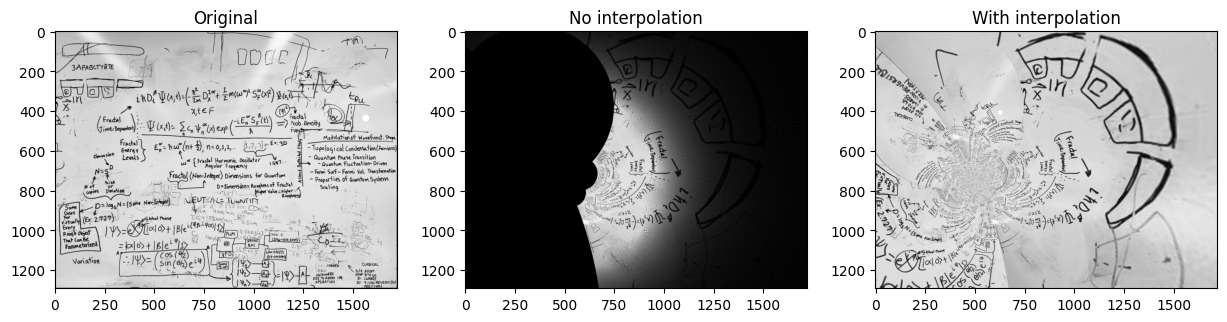

In [13]:
# M must be >1
# The smaller M is, the more "normal" the output looks
M=7

# Mode can be chosen from 'reflect’, ‘constant’, ‘nearest’, ‘mirror’, ‘wrap’
mode = 'wrap'

# If user_defined == False, then it is random (recommended)
user_defined = False
start_points = 32, 16, 16, 32, 32, 48
end_points = 16, 32, 32, 48, 48, 32
new_image, uninterpolated_image = mobius_fast_interpolation(image,
                                                            M,
                                                            mode = mode,
                                                            output_height=height,
                                                            output_width=width,
                                                            user_defined=user_defined,
                                                            start_points = start_points,
                                                            end_points = end_points)

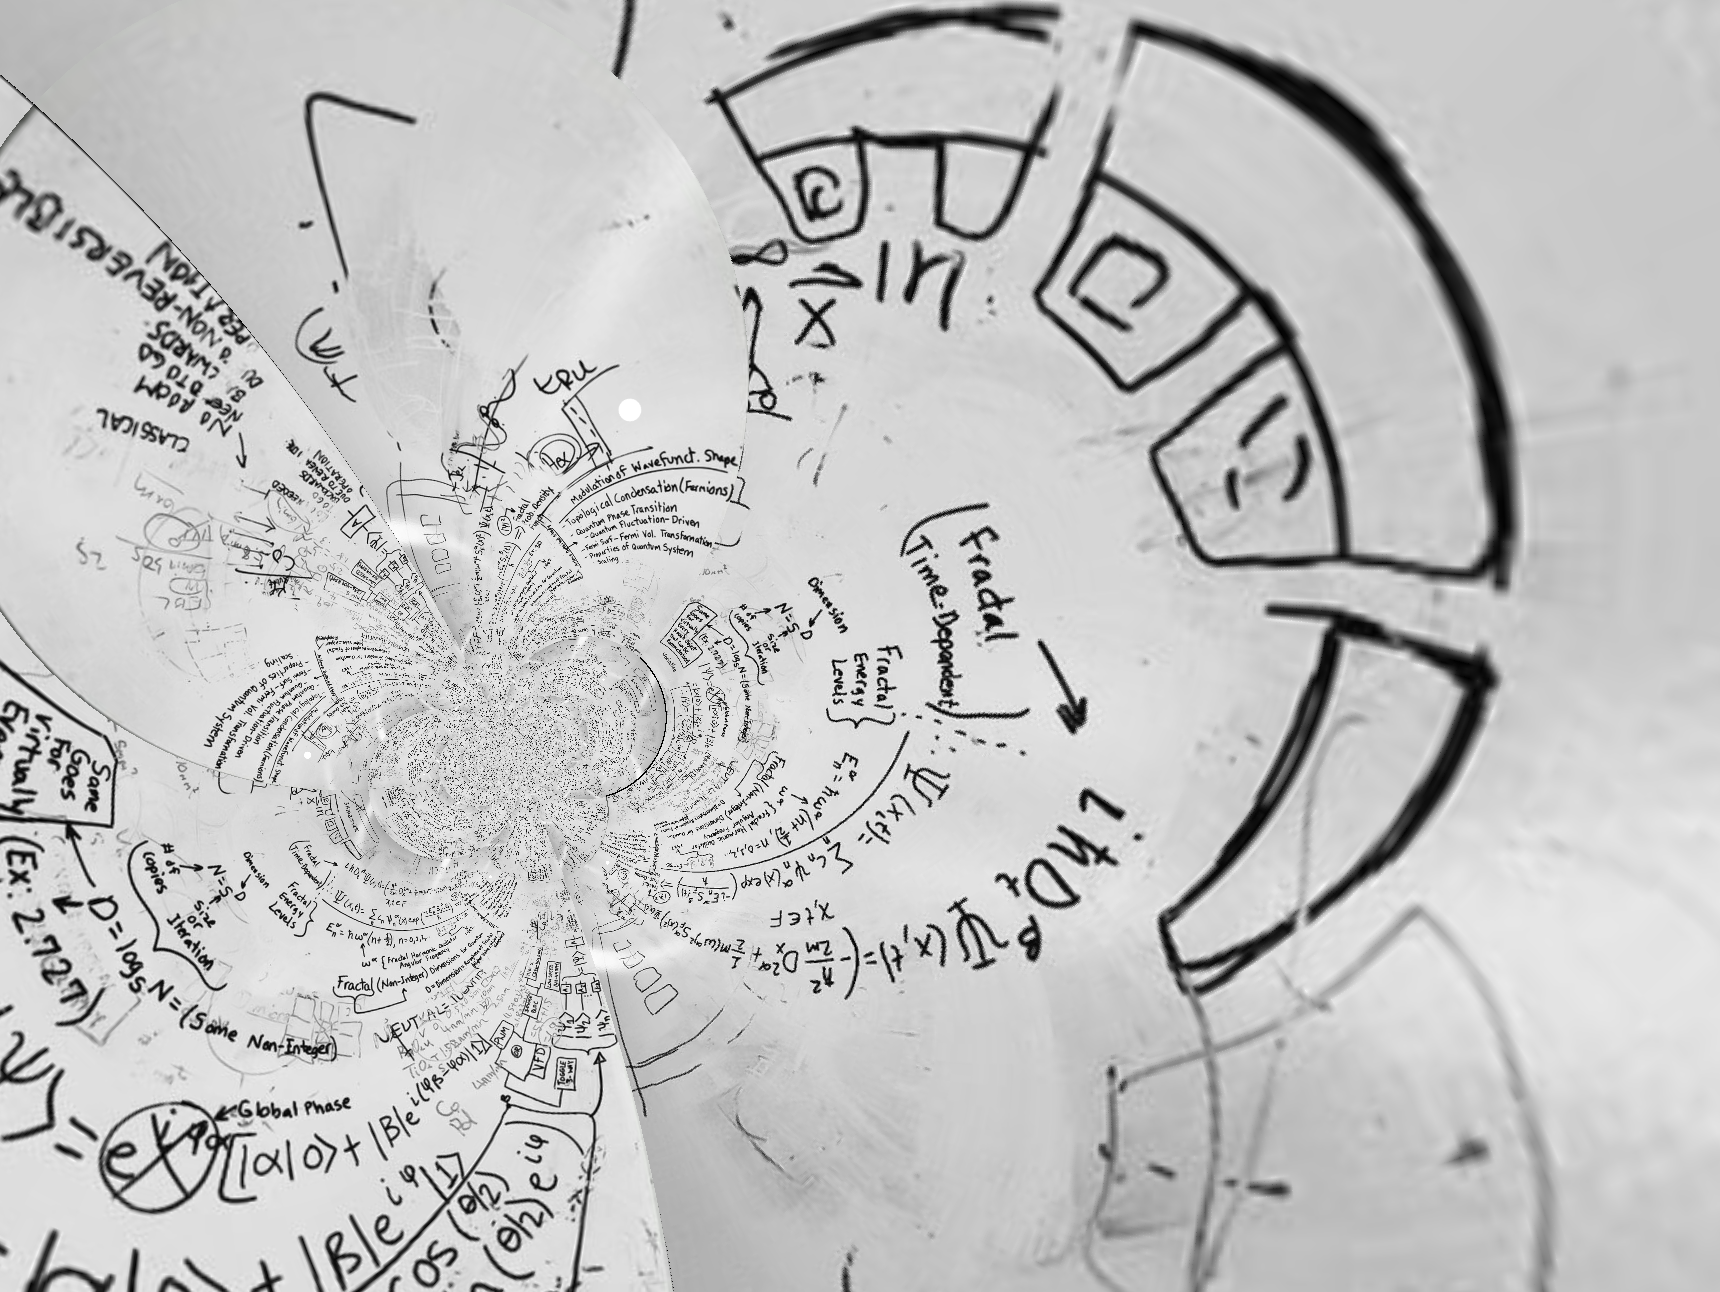

In [14]:
new_image

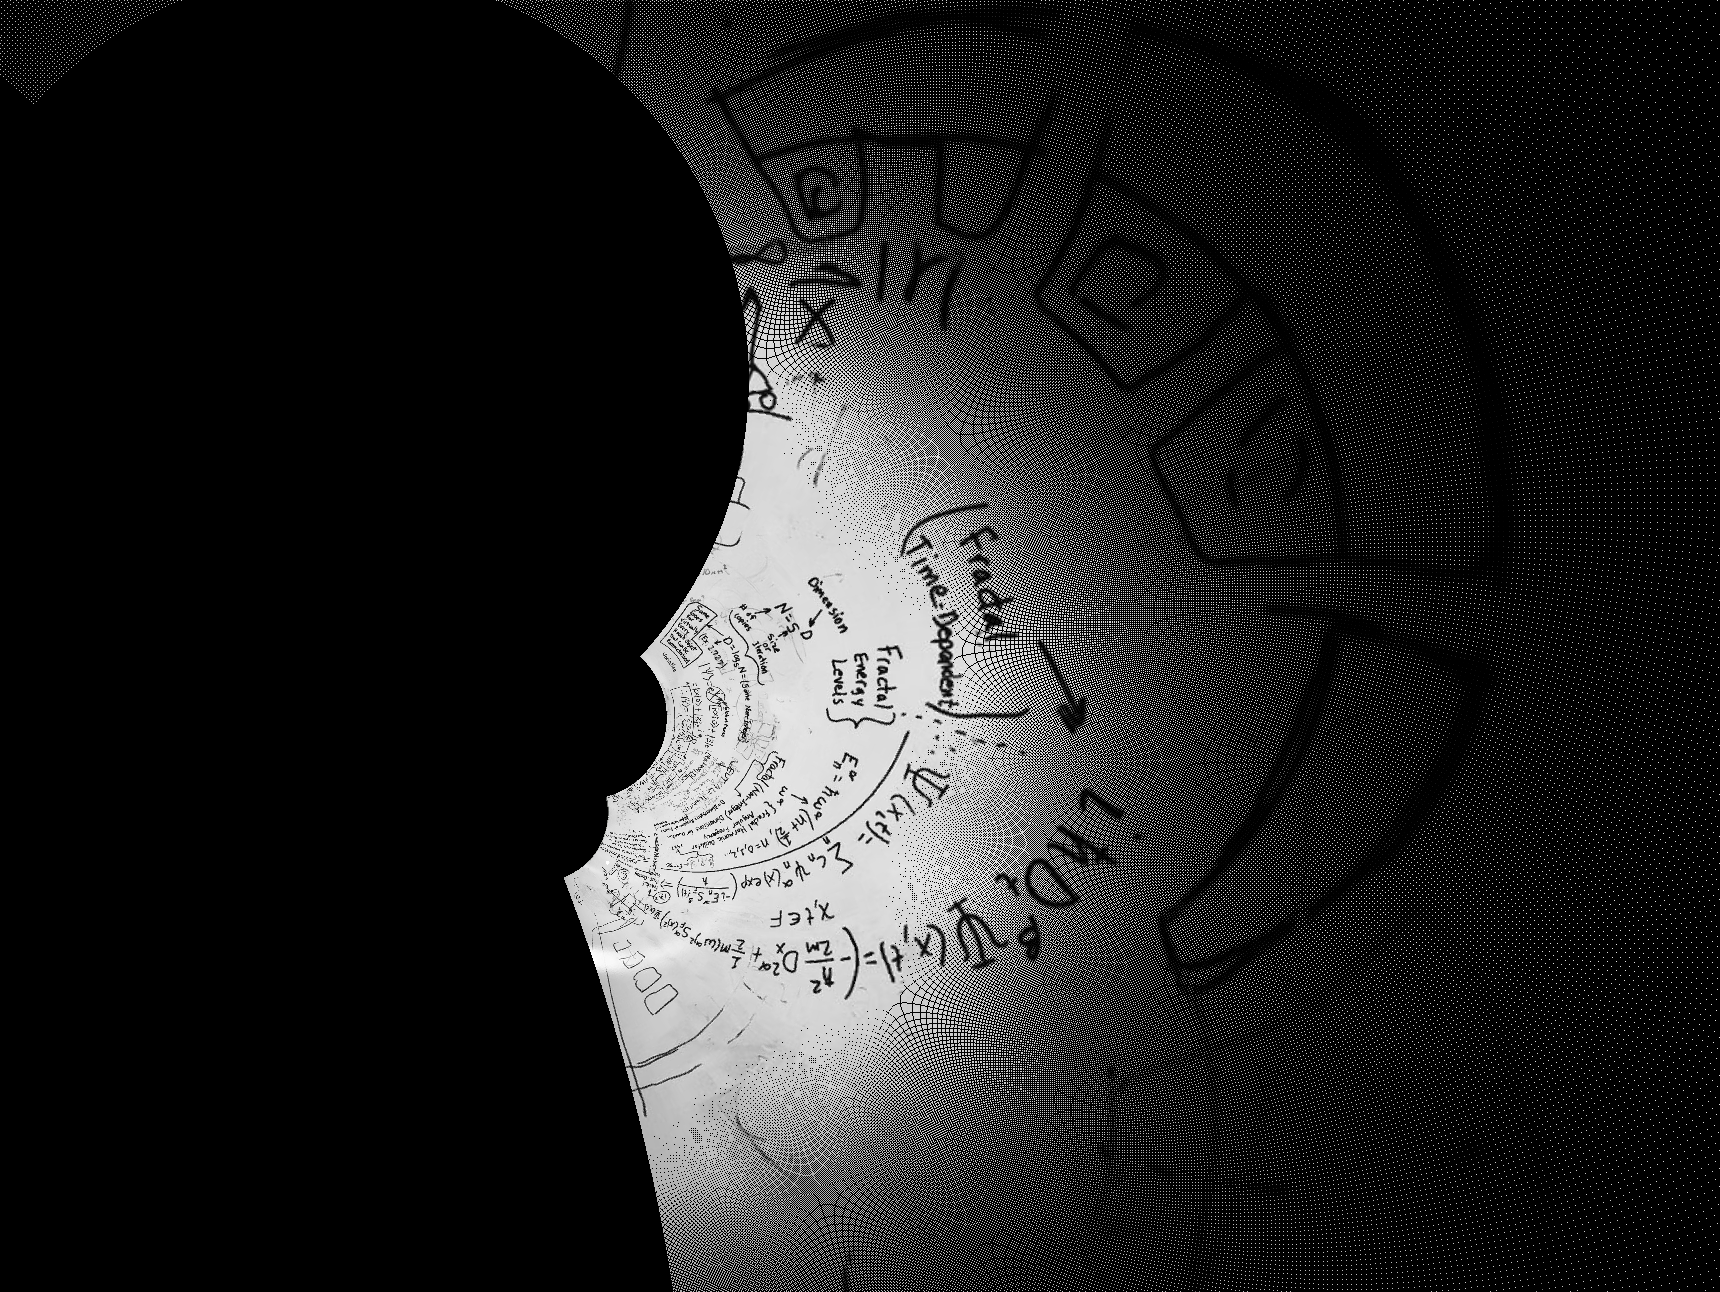

In [15]:
uninterpolated_image